### Predictive Model for Insurance Claims

In [1]:
##Import Packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px


from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline 
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from category_encoders import OneHotEncoder
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

In [2]:
## Import the dataset to read and analyse
data = pd.read_csv("C:\\Users\\User\\Desktop\\PROJECT GITHUB\\PYTHON\\INSURANCE CLAIM ANALYSIS\\insurance_data.csv")

data = data.set_index("index")

# Data Inspection and Data Wrangling for EDA

In [3]:
# Display first 5 rows
data.head() 

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
index,,,,,,,,,,
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [4]:
#View number of rows and columns
data.shape

(1340, 10)

In [5]:
# View information about the DataFrame with .info() function
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 115.2+ KB


## Data Wrangling

In [6]:
# Drop missing values from age and region
data = data.dropna()

In [7]:
# Checking for duplication
data.duplicated().sum()

0

In [8]:
#Remove High and Low Cardinality
data.select_dtypes("number").nunique().astype(float)
data.drop(columns = ["PatientID"],inplace = True)

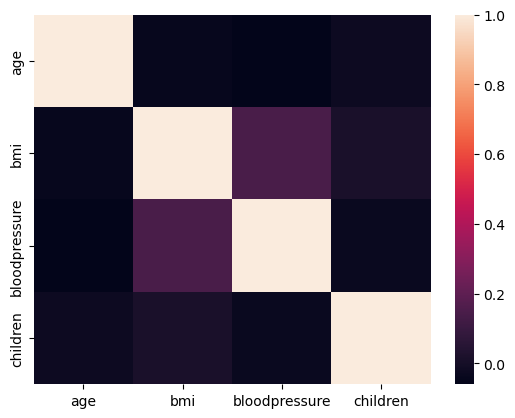

In [9]:
# Checking for Multicollinearity

correlation = data.select_dtypes("number").drop(columns=["claim"]).corr()
sns.heatmap(correlation);

## Data Visualization and Analysis

In [10]:
data.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
index,,,,,,,,,
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
7,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,30.0,male,53.1,97,No,0,No,northwest,1163.46


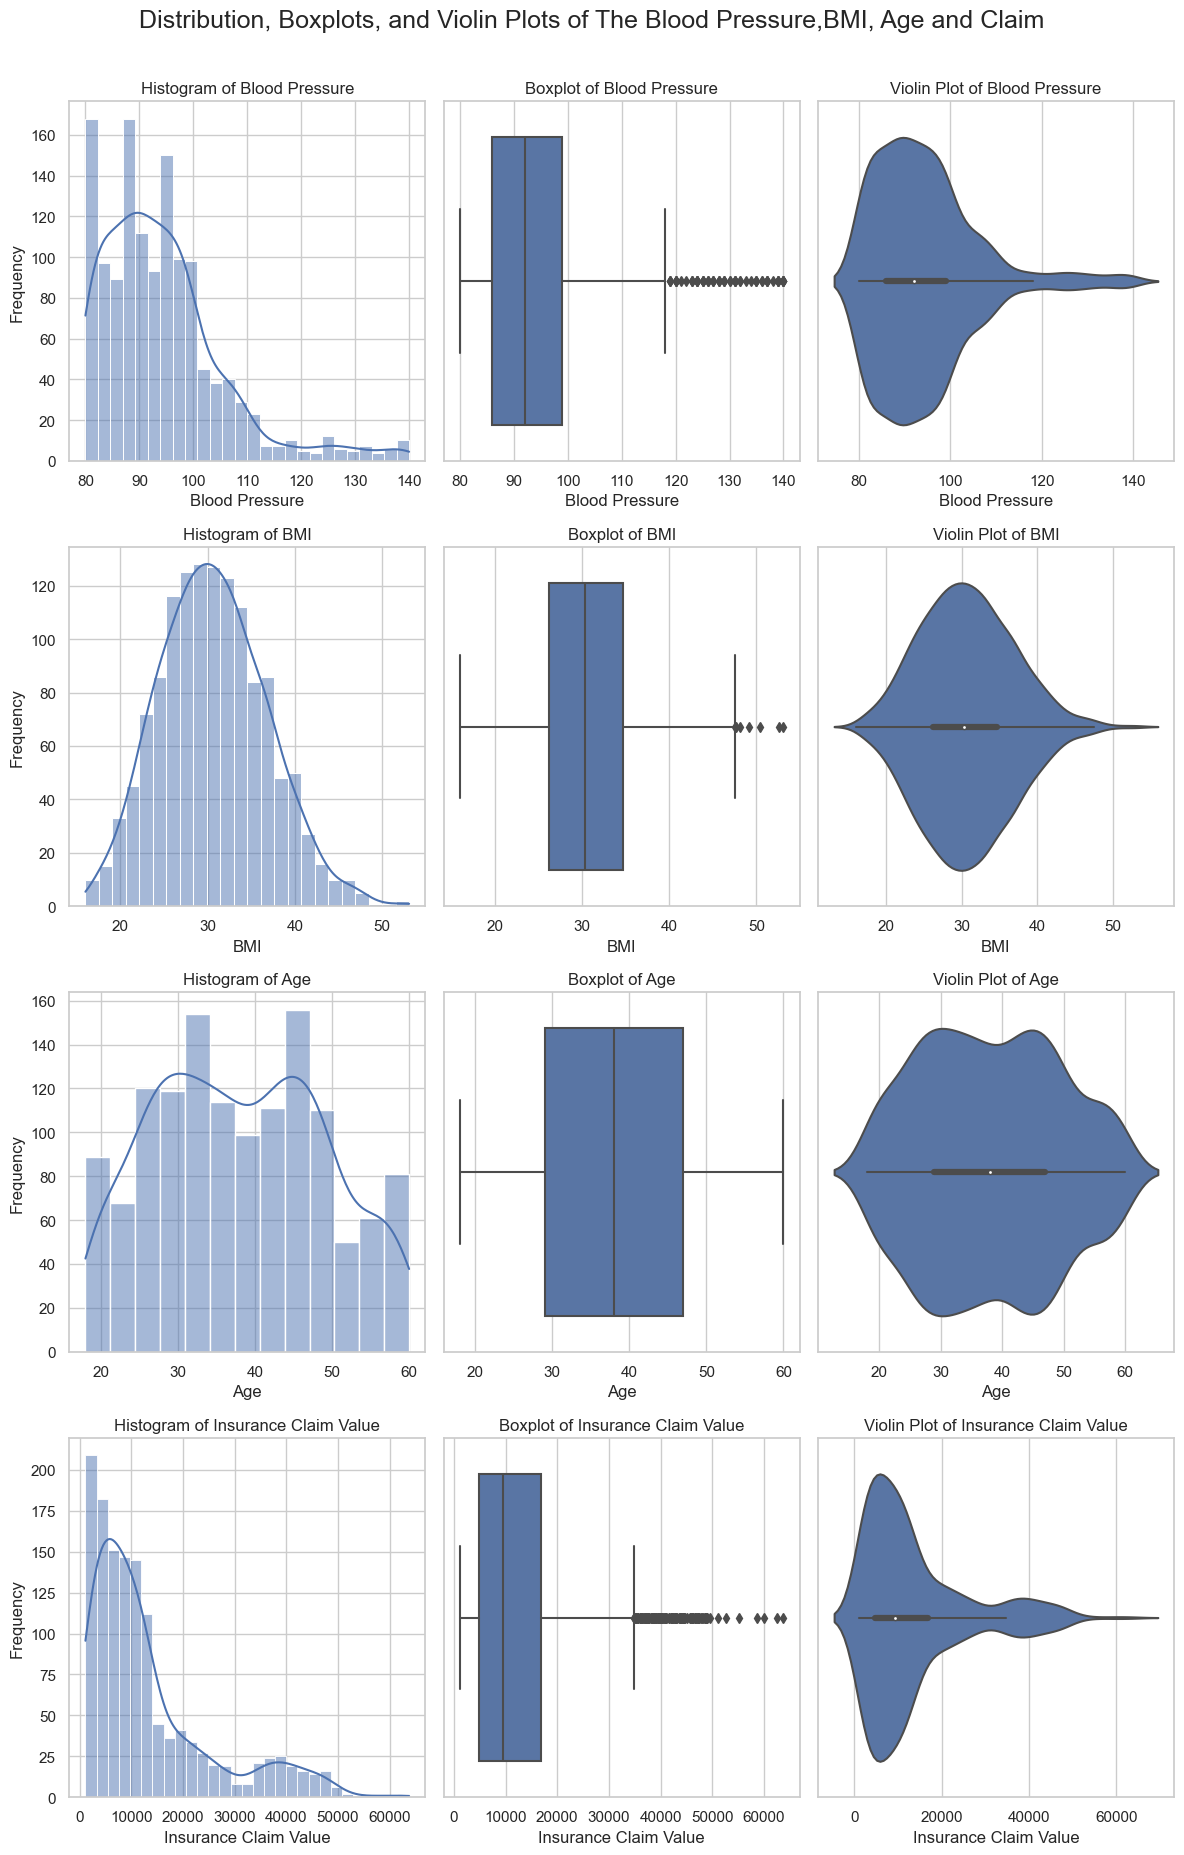

In [11]:
#Histogram, Boxplots, and Violin Plots of The Blood Pressure,BMI, Age and Claim
sns.set(style="whitegrid")

fig, axes = plt.subplots(4, 3, figsize=(12, 18))

# Plot 1: Blood Pressure
# Histogram
sns.histplot(data=data, x='bloodpressure', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Blood Pressure')
axes[0, 0].set_xlabel('Blood Pressure')
axes[0, 0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(data=data, x='bloodpressure', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Blood Pressure')
axes[0, 1].set_xlabel('Blood Pressure')

# Violin plot
sns.violinplot(data=data, x='bloodpressure', ax=axes[0, 2])
axes[0, 2].set_title('Violin Plot of Blood Pressure')
axes[0, 2].set_xlabel('Blood Pressure')

# Plot 2: BMI
# Histogram
sns.histplot(data=data, x='bmi', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of BMI')
axes[1, 0].set_xlabel('BMI')
axes[1, 0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(data=data, x='bmi', ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of BMI')
axes[1, 1].set_xlabel('BMI')

# Violin plot
sns.violinplot(data=data, x='bmi', ax=axes[1, 2])
axes[1, 2].set_title('Violin Plot of BMI')
axes[1, 2].set_xlabel('BMI')

# Plot 3: Age
# Histogram
sns.histplot(data=data, x='age', kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Histogram of Age')
axes[2, 0].set_xlabel('Age')
axes[2, 0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(data=data, x='age', ax=axes[2, 1])
axes[2, 1].set_title('Boxplot of Age')
axes[2, 1].set_xlabel('Age')

# Violin plot
sns.violinplot(data=data, x='age', ax=axes[2, 2])
axes[2, 2].set_title('Violin Plot of Age')
axes[2, 2].set_xlabel('Age')

# Plot 4: Insurance Claim Value
# Histogram
sns.histplot(data=data, x='claim', kde=True, ax=axes[3, 0])
axes[3, 0].set_title('Histogram of Insurance Claim Value')
axes[3, 0].set_xlabel('Insurance Claim Value')
axes[3, 0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(data=data, x='claim', ax=axes[3, 1])
axes[3, 1].set_title('Boxplot of Insurance Claim Value')
axes[3, 1].set_xlabel('Insurance Claim Value')

# Violin plot
sns.violinplot(data=data, x='claim', ax=axes[3, 2])
axes[3, 2].set_title('Violin Plot of Insurance Claim Value')
axes[3, 2].set_xlabel('Insurance Claim Value')

plt.tight_layout()


fig.suptitle('Distribution, Boxplots, and Violin Plots of The Blood Pressure,BMI, Age and Claim', fontsize=18, y=1.03)


plt.show()

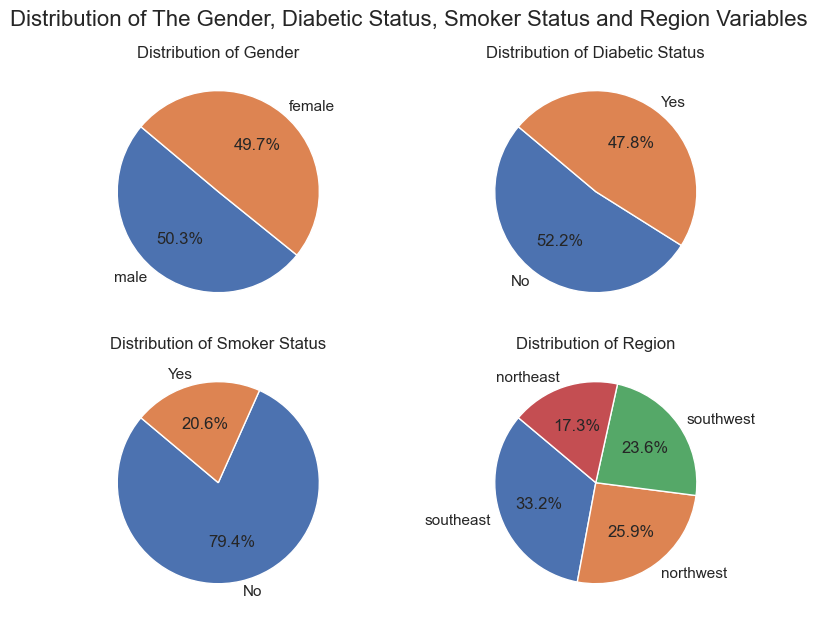

In [12]:
# Distribution of The Gender, Diabetic Status, Smoker Status and Region Variables
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Plot 1: Pie chart for gender
gender_counts = data['gender'].value_counts()
axes[0, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title('Distribution of Gender')

# Plot 2: Pie chart for diabetic status
diabetic_counts = data['diabetic'].value_counts()
axes[0, 1].pie(diabetic_counts, labels=diabetic_counts.index, autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title('Distribution of Diabetic Status')

# Plot 3: Pie chart for smoker status
smoker_counts = data['smoker'].value_counts()
axes[1, 0].pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=140)
axes[1, 0].set_title('Distribution of Smoker Status')

# Plot 4: Pie chart for region
region_counts = data['region'].value_counts()
axes[1, 1].pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)
axes[1, 1].set_title('Distribution of Region')

plt.tight_layout()

fig.suptitle('Distribution of The Gender, Diabetic Status, Smoker Status and Region Variables', fontsize=16, y=1.03)

plt.show()


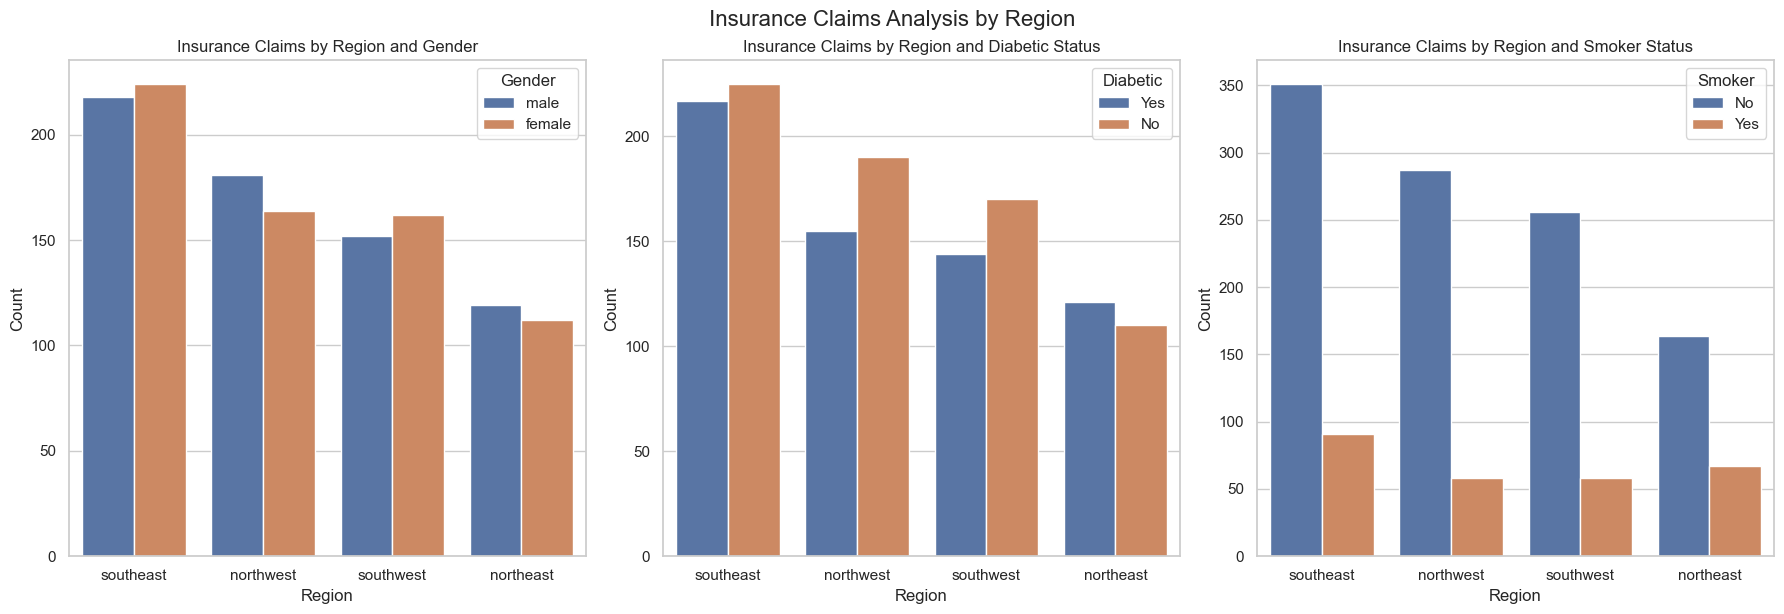

In [13]:
# Insurance Claim By Region

sns.set(style="whitegrid")

# Create a figure with a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Number of the Insurance claims by region against the gender
sns.countplot(data=data, x='region', hue='gender', ax=axes[0])
axes[0].set_title('Insurance Claims by Region and Gender')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Count')
axes[0].legend(title='Gender')

# Plot 2: Number of the Insurance claims by region against the diabetic
sns.countplot(data=data, x='region', hue='diabetic', ax=axes[1])
axes[1].set_title('Insurance Claims by Region and Diabetic Status')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Count')
axes[1].legend(title='Diabetic')

# Plot 3: Number of the Insurance claims by region against the smoker
sns.countplot(data=data, x='region', hue='smoker', ax=axes[2])
axes[2].set_title('Insurance Claims by Region and Smoker Status')
axes[2].set_xlabel('Region')
axes[2].set_ylabel('Count')
axes[2].legend(title='Smoker')

plt.tight_layout()

fig.suptitle('Insurance Claims Analysis by Region', fontsize=16, y=1.02)

plt.show()


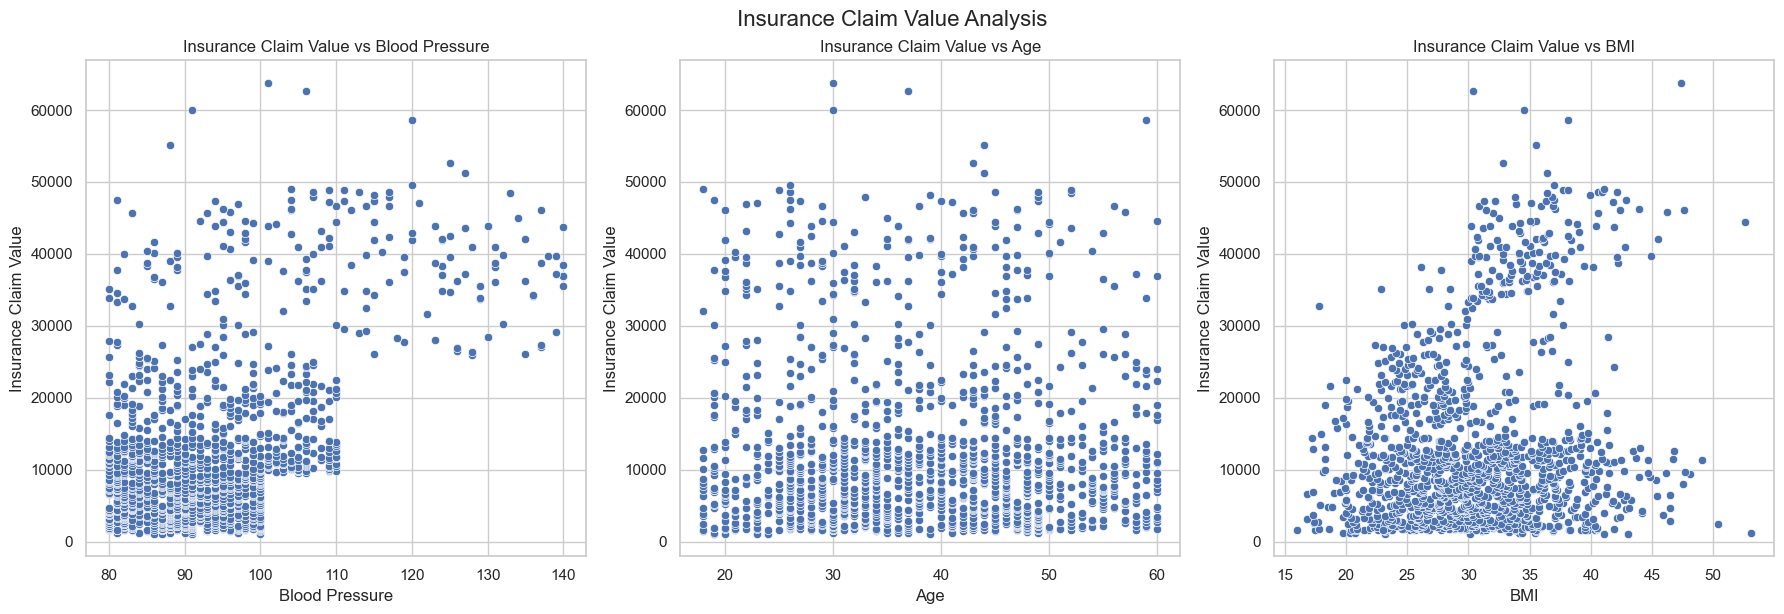

In [14]:

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Insurance claim value against blood pressure
sns.scatterplot(data=data, x='bloodpressure', y='claim', ax=axes[0])
axes[0].set_title('Insurance Claim Value vs Blood Pressure')
axes[0].set_xlabel('Blood Pressure')
axes[0].set_ylabel('Insurance Claim Value')

# Plot 2: Insurance claim value against age
sns.scatterplot(data=data, x='age', y='claim', ax=axes[1])
axes[1].set_title('Insurance Claim Value vs Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Insurance Claim Value')

# Plot 3: Insurance claim value against BMI
sns.scatterplot(data=data, x='bmi', y='claim', ax=axes[2])
axes[2].set_title('Insurance Claim Value vs BMI')
axes[2].set_xlabel('BMI')
axes[2].set_ylabel('Insurance Claim Value')


plt.tight_layout()

fig.suptitle('Insurance Claim Value Analysis', fontsize=16, y=1.02)

plt.show()


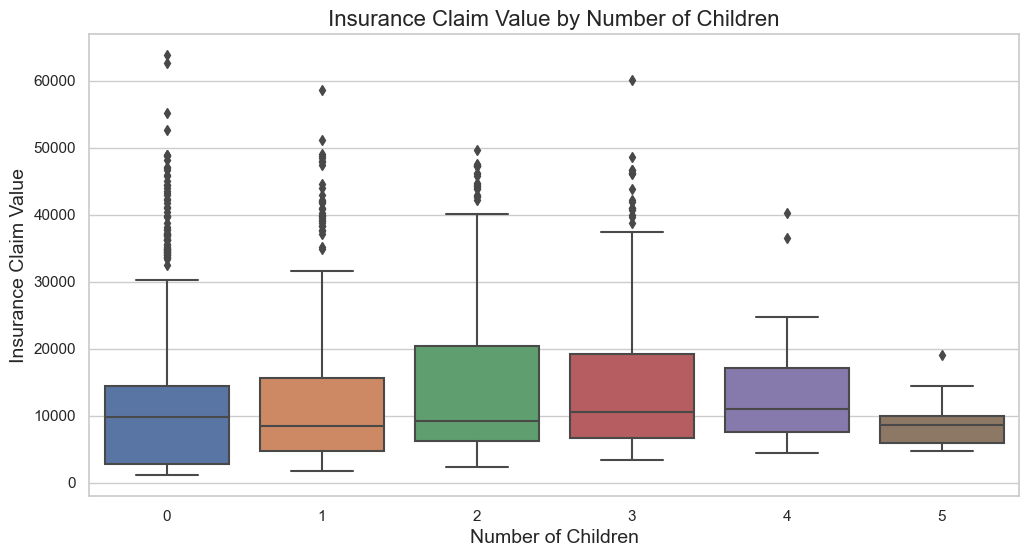

In [15]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=data, x='children', y='claim', ax=ax)

ax.set_title('Insurance Claim Value by Number of Children', fontsize=16)
ax.set_xlabel('Number of Children', fontsize=14)
ax.set_ylabel('Insurance Claim Value', fontsize=14)

plt.show()

## DATA MODELING

In [16]:
### Remove outlier
low, high = data["claim"].quantile([0.1, 0.9])

data = data[data["claim"].between(low, high)]

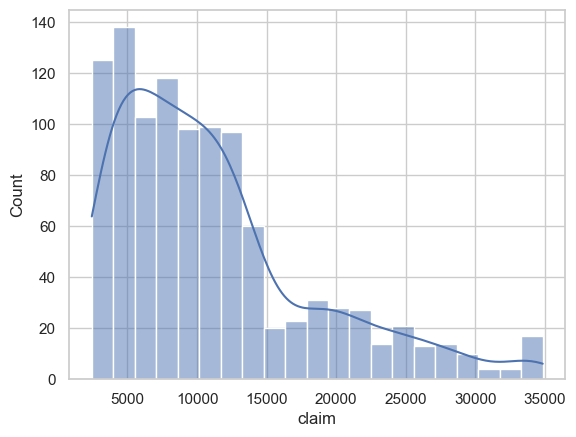

In [17]:
sns.histplot(data=data, x='claim', kde=True);

In [18]:
data.describe()

,age,bmi,bloodpressure,children,claim
count,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000
mean,38.350564,30.115038,92.812970,1.204887,11110.897105
std,11.126158,5.959736,9.427536,1.231193,7205.518282
min,18.000000,16.800000,80.000000,0.000000,2438.060000
25%,29.000000,25.800000,86.000000,0.000000,5626.687500
50%,38.000000,29.750000,92.000000,1.000000,9412.965000
75%,47.000000,33.700000,98.000000,2.000000,13824.880000
max,60.000000,50.400000,139.000000,5.000000,34828.650000


In [19]:
### BASELINE MODEL
target = "claim"
X_train = data.drop(columns = target)
y_train = data[target]

y_mean = y_train.mean()
y_baseline_pred = [y_mean]*len(y_train)

print("The mean of the y_train is :", y_mean)
print("The mean absolute error of the baseline model is:", mean_absolute_error(y_train, y_baseline_pred) )

The mean of the y_train is : 11110.897105263159
The mean absolute error of the baseline model is: 5524.158918183617


In [20]:
###INSTANTIATE

##Ridge
model_Ridge = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    Ridge()
)

model_Ridge.fit(X_train, y_train)

y_pred_ridge = model_Ridge.predict(X_train)

mean_absolute_error_Ridge = round(mean_absolute_error(y_train, y_pred_ridge),4)
print("The mean absolute error of the Ridge Model is:", mean_absolute_error_Ridge )


The mean absolute error of the Ridge Model is: 3826.8564


In [21]:
## Random Forest Regressor

model_forest = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    RandomForestRegressor()
)

model_forest.fit(X_train, y_train)

y_pred_forest = model_forest.predict(X_train)

mean_absolute_error_forest = round(mean_absolute_error(y_train, y_pred_forest),4)
print("The mean absolute error of the Random Forest Model is:", mean_absolute_error_forest )


The mean absolute error of the Random Forest Model is: 1353.5364


In [22]:
## Decision Tree Regressor

model_DecisionTree = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    DecisionTreeRegressor()
)

model_DecisionTree.fit(X_train, y_train)

y_pred_tree = model_DecisionTree.predict(X_train)

mean_absolute_error_tree = round(mean_absolute_error(y_train, y_pred_tree),4)
print("The mean absolute error of the Decision Tree Model is:", mean_absolute_error_tree )


The mean absolute error of the Decision Tree Model is: 0.0


In [23]:
def make_prediction(age,gender,bmi,bloodpressure,diabetic,children,smoker,region):
    data = {"age": age,
            "gender":gender,
            "bmi" : bmi,
            "bloodpressure" : bloodpressure,
            "diabetic" : diabetic,
            "children" : children,
            "smoker" : smoker,
             "region" : region 
           }
    df = pd.DataFrame(data , index = [0]) 
    prediction = model_DecisionTree.predict(df).round(2)[0]
    return f"Predicted claim value: ${prediction}"

In [24]:
make_prediction(27,"female",21.9,80,"No",2,"No","southeast")

'Predicted claim value: $3180.51'

In [25]:
interact(
    make_prediction,
    age=IntSlider(
        min=X_train["age"].min(),
        max=X_train["age"].max(),
        value=X_train["age"].mean(),
    ),
    bmi=IntSlider(
        min=X_train["bmi"].min(),
        max=X_train["bmi"].max(),
        value=X_train["bmi"].mean(),
    ),
    bloodpressure=FloatSlider(
        min=X_train["bloodpressure"].min(),
        max=X_train["bloodpressure"].max(),
        step=0.01,
        value=X_train["bloodpressure"].mean(),
    ),
    gender=Dropdown(options=sorted(X_train["gender"].unique())),
    diabetic=Dropdown(options=sorted(X_train["diabetic"].unique())),
    children=Dropdown(options=sorted(X_train["children"].unique())),
    smoker=Dropdown(options=sorted(X_train["smoker"].unique())),
    region=Dropdown(options=sorted(X_train["region"].unique())),
);

interactive(children=(IntSlider(value=38, description='age', max=60, min=18), Dropdown(description='gender', o…

In [26]:
##